<a href="https://colab.research.google.com/github/caiocmello/netzdg/blob/main/NetzDG_URLs(incl_RT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Run to install packages (use csv file 'df_urls_inclRT2.csv')
import pandas as pd
import nltk
import spacy
import plotly.express as px
import plotly.graph_objects as go
import re
import os
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from spacy.lang.en.stop_words import STOP_WORDS as en_stopwords
from spacy.lang.de.stop_words import STOP_WORDS as de_stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
df = pd.read_csv('final_dataframe_urls.csv')
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
df['original_url'] = df['original_url'].astype(str)
def clean_url(url):
  parts = url.split('/')
  if len(parts) >= 4:
    return '/'.join(parts[:3])
  else:
    return url

df['cleaned_url'] = df['original_url'].apply(clean_url)

In [2]:
# Run this cell to see the top 20 most tweeted URLs (change number in code to see more than 20)
urls = df['original_url'].value_counts()
print(urls[:20])

original_url
https://philosophia-perennis.com/2018/01/01/storch-twitter/                                                                      1007
https://www.der-postillon.com/2017/05/netzwerkdurchsetzungsgesetz.html                                                            898
https://www.tichyseinblick.de/meinungen/netzdg-maas-netzwerkdurchsetzungsgesetz/                                                  847
https://www.gutjahr.biz/2018/01/hatespeech/                                                                                       660
https://twitter.com/Anwalt_Jun/status/1588652399610449921/photo/1                                                                 636
https://www.tichyseinblick.de/kolumnen/alexander-wallasch-heute/verschaerfung-des-netzdg-bundesregierung-versus-bevoelkerung/     549
https://twitter.com/marteimer/status/954143230567813121/photo/1                                                                   520
https://www.europa-konzept.eu/geben-sie-gedankenf

In [7]:
# @title See list of URLs posted by user
user = "hwieduwilt" # @param {"type":"string"}
user_df = df[df['user_username'] == user]
url_counts = user_df['original_url'].value_counts()
print(url_counts)

original_url
https://twitter.com/gutjahr/status/951442637206310912                                                                                                                                                                                                                                                              2
https://blogs.faz.net/wort/2018/01/08/das-ueberschaetzte-recht-514/                                                                                                                                                                                                                                                2
https://www.faz.net/aktuell/gesellschaft/kriminalitaet/wie-der-taeter-aus-halle-sich-selbst-wahrnahm-16430400.html                                                                                                                                                                                                 2
https://twitter.com/ReporterOG/status/948862436685135872    

In [10]:
# Most shared URLs in cluster BLUE

df_blue = df[df['modularity_class'] == 'blue']
url_countsb = df_blue['original_url'].value_counts()
print(url_countsb[:20])

original_url
https://www.gutjahr.biz/2018/01/hatespeech/                                                                                             583
https://twitter.com/marteimer/status/954143230567813121/photo/1                                                                         506
https://www.der-postillon.com/2017/05/netzwerkdurchsetzungsgesetz.html                                                                  481
https://www.reporter-ohne-grenzen.de/presse/pressemitteilungen/meldung/russland-kopiert-gesetz-gegen-hassbotschaften/                   302
https://bit.ly/2lZbRPJ                                                                                                                  298
https://twitter.com/tagesschau/status/948584747114131457/photo/1                                                                        197
https://www.heise.de/tp/features/Justizamt-entwertet-Zustellungsvorschrift-im-NetzDG-4171820.html                                       196
https:/

In [11]:
# Most shared URLs in cluster PURPLE

df_purple = df[df['modularity_class'] == 'purple']
url_countsp = df_purple['original_url'].value_counts()
print(url_countsp[:20])

original_url
https://philosophia-perennis.com/2018/01/01/storch-twitter/                                                                                                868
https://www.tichyseinblick.de/meinungen/netzdg-maas-netzwerkdurchsetzungsgesetz/                                                                           595
https://www.tichyseinblick.de/kolumnen/alexander-wallasch-heute/verschaerfung-des-netzdg-bundesregierung-versus-bevoelkerung/                              426
https://www.europa-konzept.eu/geben-sie-gedankenfreiheit-schiller/netzwerkdurchsetzungsgesetz-l%C3%B6schen-ist-kein-argument/                              420
https://www.europa-konzept.eu/geben-sie-gedankenfreiheit-schiller/netzwerkdurchsetzungsgesetz-löschen-ist-kein-argument/                                   358
https://facebook-sperre.steinhoefel.de/illegal-content-2868/                                                                                               341
https://www.der-postillon.com/201

In [12]:
# Most shared URLs in cluster ORANGE

df_orange = df[df['modularity_class'] == 'orange']
url_countso = df_orange['original_url'].value_counts()
print(url_countso[:20])

original_url
https://twitter.com/c_lindner/status/939441435006373889/photo/1                                                      157
https://twitter.com/HeikoMaas/status/1125035257508573189                                                             144
https://twitter.com/larsklingbeil/status/1125037778994192385                                                         140
https://twitter.com/handelsblatt/status/880737503577329664/photo/1                                                   138
https://twitter.com/_donalphonso/status/1125039703621816320/photo/1                                                  128
https://twitter.com/nicolabeerfdp/status/914438676276490240/photo/1                                                  117
https://twitter.com/_donalphonso/status/1184506773971132416/photo/1                                                  109
https://blogs.faz.net/deus/2017/12/18/erdogans-mob-und-gruene-denunzianten-wem-das-spd-netzdg-nuetzt-4778/           108
https://twitter.com

In [13]:
# Most shared URLs in cluster RED

df_red = df[df['modularity_class'] == 'red']
url_countsr = df_red['original_url'].value_counts()
print(url_countsr[:20])

original_url
https://twitter.com/Anwalt_Jun/status/1588652399610449921/photo/1                                              550
https://twitter.com/cLayzcrypto/status/1136349889217126400/photo/1                                             269
https://twitter.com/hassmelden/status/1468223126353985541/photo/1                                              258
https://twitter.com/Anwalt_Jun/status/1345701730856669190/photo/1                                              203
https://twitter.com/hassmelden/status/1469685797611843591/photo/1                                              156
https://twitter.com/sarafischer/status/1590830921414225921                                                     119
https://twitter.com/bastelbro1/status/1571923066049142785                                                       70
https://taz.de/Justizministerin-Lambrecht-ueber-NetzDG/!5689014/                                                50
https://www.bundesjustizamt.de/DE/Themen/Buergerdienste/NetzDG/Frag

### Analysis of domains

In [14]:
# Run this cell to see the top 20 most tweeted DOMAINS (change number in code to see more than 20)
urls_dom = df['cleaned_url'].value_counts()
print(urls_dom[:20])

cleaned_url
https://twitter.com                     90133
https://www.tichyseinblick.de            8074
https://www.heise.de                     6647
https://philosophia-perennis.com         5042
https://www.facebook.com                 4593
https://netzpolitik.org                  3551
https://www.welt.de                      3001
https://bit.ly                           2630
https://www.bild.de                      2299
https://www.handelsblatt.com             1961
https://www.faz.net                      1856
https://jungefreiheit.de                 1713
https://www.spiegel.de                   1580
https://fb.me                            1465
https://blogs.faz.net                    1360
https://www.youtube.com                  1332
https://youtu.be                         1326
https://www.steinhoefel.com              1298
https://www.piratenpartei.de             1235
https://www.reporter-ohne-grenzen.de     1178
Name: count, dtype: int64


In [15]:
# @title See list of DOMAINS posted by user
user2 = "hwieduwilt" # @param {"type":"string"}
user_df2 = df[df['user_username'] == user2]
url_counts_dom = user_df2['cleaned_url'].value_counts()
print(url_counts_dom)

cleaned_url
https://twitter.com                             145
https://www.faz.net                               9
https://plus.faz.net                              6
https://blogs.faz.net                             4
https://www.bitkom.org                            4
https://www.djv.de                                3
https://edition.faz.net                           3
https://www.bundestag.de                          3
https://www.spiegel.de                            3
https://www.reporter-ohne-grenzen.de              2
https://einspruch.faz.net                         2
https://netzpolitik.org                           2
https://bit.ly                                    2
https://www.facebook.com                          2
https://www.bmjv.de                               2
https://sz.de                                     2
https://www.taz.de                                2
https://www.hrw.org                               2
https://www.freiheit.org                          2


In [16]:
# Most shared DOMAINS in cluster BLUE

url_countsbl = df_blue['cleaned_url'].value_counts()
print(url_countsbl[:20])

cleaned_url
https://twitter.com                     22819
https://www.heise.de                     3495
https://netzpolitik.org                  2460
https://bit.ly                           1415
https://www.tichyseinblick.de            1123
https://www.piratenpartei.de             1012
https://www.reporter-ohne-grenzen.de      766
https://www.faz.net                       669
https://www.spiegel.de                    659
https://www.handelsblatt.com              658
https://www.gutjahr.biz                   583
https://www.der-postillon.com             549
https://www.welt.de                       481
https://glm.io                            474
https://philosophia-perennis.com          467
https://spon.de                           454
https://www.zeit.de                       437
https://www.djv.de                        413
https://www.facebook.com                  413
https://www.tagesschau.de                 402
Name: count, dtype: int64


In [17]:
# Most shared DOMAINS in cluster PURPLE

url_countspu = df_purple['cleaned_url'].value_counts()
print(url_countspu[:20])

cleaned_url
https://twitter.com                       46048
https://www.tichyseinblick.de              5727
https://philosophia-perennis.com           4084
https://www.facebook.com                   3728
https://www.heise.de                       1998
https://www.welt.de                        1997
https://www.bild.de                        1603
https://jungefreiheit.de                   1356
https://www.steinhoefel.com                 922
https://fb.me                               910
https://www.handelsblatt.com                832
https://www.europa-konzept.eu               800
https://www.youtube.com                     723
https://blogs.faz.net                       703
https://youtu.be                            690
https://www.faz.net                         685
https://www.afd.de                          672
https://bit.ly                              656
https://www.nzz.ch                          645
https://facebook-sperre.steinhoefel.de      548
Name: count, dtype: int64


In [18]:
# Most shared URLs in cluster ORANGE

url_countsor = df_orange['cleaned_url'].value_counts()
print(url_countsor[:20])

cleaned_url
https://twitter.com                 14023
https://www.tichyseinblick.de         946
https://www.heise.de                  813
https://www.welt.de                   436
https://bit.ly                        409
https://www.faz.net                   396
https://philosophia-perennis.com      374
https://netzpolitik.org               370
https://www.handelsblatt.com          350
https://www.facebook.com              339
https://blogs.faz.net                 325
https://www.bild.de                   282
https://www.youtube.com               228
https://www.spiegel.de                225
https://youtu.be                      219
https://fb.me                         197
https://spon.de                       182
https://www.tagesspiegel.de           179
https://buff.ly                       177
https://www.tagesschau.de             176
Name: count, dtype: int64


In [19]:
# Most shared URLs in cluster RED

url_countsre = df_red['cleaned_url'].value_counts()
print(url_countsre[:20])

cleaned_url
https://twitter.com                   4681
https://www.heise.de                   226
https://netzpolitik.org                184
https://www.bundesjustizamt.de         181
https://www.spiegel.de                 165
https://bit.ly                         118
https://spon.de                        108
https://www.handelsblatt.com            98
https://www.faz.net                     72
https://www.tagesschau.de               71
https://taz.de                          65
https://www.bmjv.de                     64
https://youtu.be                        64
https://www.zeit.de                     63
https://heise.de                        48
https://www.lto.de                      47
https://www.zdf.de                      43
https://transparency.twitter.com        41
https://www.gesetze-im-internet.de      40
https://www.facebook.com                38
Name: count, dtype: int64


# Data visualisation

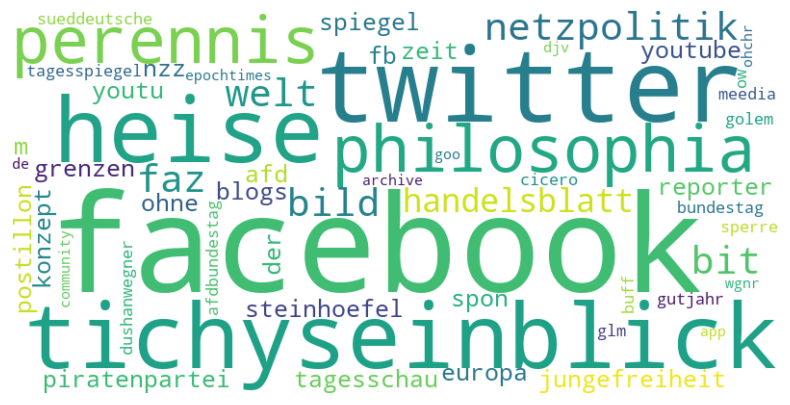

In [20]:
# @title See wordcloud with top 50 domains (including Twitter)
# generate a wordcloud with values in column domain

df['domain'] = df['cleaned_url'].str.replace('https://', '')
df['domain'] = df['domain'].str.replace('www.', '')
df['domain'] = df['domain'].str.replace('.com', '')
df['domain'] = df['domain'].str.replace('http://', '')

def remove_after_dot(domain):
  if isinstance(domain, str):
    parts = domain.split('.')
    if len(parts) > 0:
      return parts[0]
  return domain

df['domain'] = df['domain'].apply(remove_after_dot)
counting = df['domain'].value_counts()

df_wc = counting[:50]
df_wc = df_wc.reset_index()

text = " ".join(df_wc['domain'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

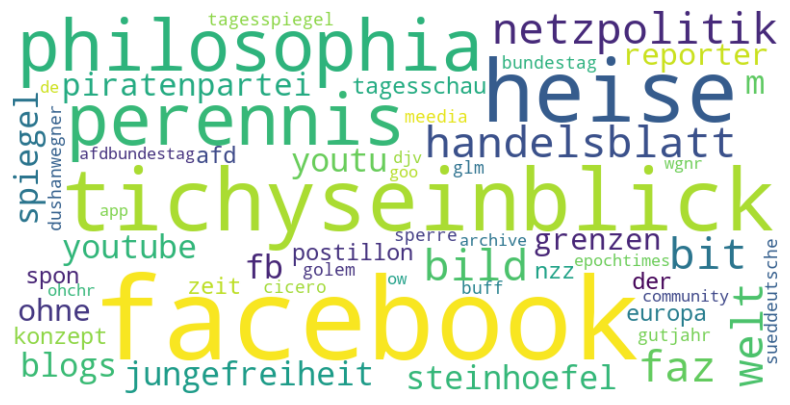

In [21]:
# @title See wordcloud with top 50 domains (without Twitter)
# generate a wordcloud with values in column domain

df['domain'] = df['cleaned_url'].str.replace('https://', '')
df['domain'] = df['domain'].str.replace('www.', '')
df['domain'] = df['domain'].str.replace('.com', '')
df['domain'] = df['domain'].str.replace('http://', '')


def remove_after_dot(domain):
  if isinstance(domain, str):
    parts = domain.split('.')
    if len(parts) > 0:
      return parts[0]
  return domain

df['domain'] = df['domain'].apply(remove_after_dot)
counting = df['domain'].value_counts()

df_wc = counting[:50]
df_wc = df_wc.reset_index()
df_wc = df_wc[df_wc['domain'] != 'twitter']

text = " ".join(df_wc['domain'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# See specific websites linked in tweets
(Eg. https://www.youtube.com or https://www.facebook.com or https://www.tichyseinblick.de)

In [23]:
# @title Run to see list of tweets mentioning website
website = "https://www.youtube.com" # @param {"type":"string"}
selected_rows = df[df['cleaned_url'].isin([website])]
selected_rows.head()

,id,user_username,text,created_at,retweet_count,like_count,modularity_class,url,original_url,cleaned_url,domain
202,204,Maleo252,Sie können unsere Tweets und Äußerungen unterd...,2018-05-28T16:04:23.000Z,0,1,purple,https://t.co/pdfLqesDas,https://www.youtube.com/watch?v=YVc0wBLri1A,https://www.youtube.com,youtube
553,555,Yutani_says,Ein neues Video der Vulgären Analyse zum Thema...,2018-06-08T06:51:47.000Z,0,0,purple,https://t.co/ThPkx2adj4,https://www.youtube.com/watch?v=ov38b827hYk,https://www.youtube.com,youtube
1064,1066,Yutani_says,Bevor es vom NetzDG entfernt wird: Das neue Vi...,2018-06-12T13:55:33.000Z,0,0,purple,https://t.co/Owve0IsLiE,https://www.youtube.com/watch?v=T1BpF7XSVOE&fe...,https://www.youtube.com,youtube
1277,1279,SpookyMoth,RT @gamergateblogde #Weltraumaffen - der medie...,2018-06-17T12:27:07.000Z,7,0,orange,https://t.co/9bXr9FdedZ,https://www.youtube.com/watch?v=OiGaFRWh6Sw,https://www.youtube.com,youtube
1285,1287,sebwan1,RT @gamergateblogde #Weltraumaffen - der medie...,2018-06-17T12:05:32.000Z,7,0,orange,https://t.co/9bXr9FdedZ,https://www.youtube.com/watch?v=OiGaFRWh6Sw,https://www.youtube.com,youtube


In [24]:
# See how many times the website chosen above is mentioned in corpus (Found in 'Index: XXXX entries')
selected_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1332 entries, 202 to 194024
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1332 non-null   int64 
 1   user_username     1332 non-null   object
 2   text              1332 non-null   object
 3   created_at        1332 non-null   object
 4   retweet_count     1332 non-null   int64 
 5   like_count        1332 non-null   int64 
 6   modularity_class  1332 non-null   object
 7   url               1332 non-null   object
 8   original_url      1332 non-null   object
 9   cleaned_url       1332 non-null   object
 10  domain            1332 non-null   object
dtypes: int64(3), object(8)
memory usage: 124.9+ KB


In [26]:
# See how many times each cluster mentions website chosen above (PS: too see results for a different URL, run the website search again!)

cluster_counts = selected_rows['modularity_class'].value_counts()
print(cluster_counts)

modularity_class
purple       723
blue         328
orange       228
red           31
turquoise     22
Name: count, dtype: int64


In [27]:
# See the most mentioned links for specific website chosen above (PS: to see more websites, replace number '10' in code)
url_counts2 = selected_rows['original_url'].value_counts()
print(url_counts2[:10])

original_url
https://www.youtube.com/watch?v=KMhdSWbHB6c&feature=youtu.be                           77
https://www.youtube.com/watch?v=raZLls0vLgw&feature=youtu.be                           51
https://www.youtube.com/watch?v=tz4I_ta2E8o&feature=youtu.be                           48
https://www.youtube.com/watch?v=OAlW2tym_Ew                                            47
https://www.youtube.com/watch?v=Hb5vS_kQhJs&feature=share                              35
https://www.youtube.com/watch?v=85CTmIaTlYA&feature=youtu.be                           32
https://www.youtube.com/watch?v=RmRperFgMjY                                            30
https://www.youtube.com/watch?v=DhqpAN2BGCc&list=PLcb3Ae1k5I2IF8fUlpkq-h_nTXMkkLaLd    30
https://www.youtube.com/watch?v=YNyVQ048pdg&t=172s                                     30
https://www.youtube.com/watch?v=A8CNItPYBho                                            28
Name: count, dtype: int64


In [28]:
# Most mentioned URLs in cluster blue for specific website chosen above

df_blue2 = selected_rows[selected_rows['modularity_class'] == 'blue']
url_countsbl2 = df_blue2['original_url'].value_counts()
print(url_countsbl2[:20])

original_url
https://www.youtube.com/watch?v=DhqpAN2BGCc&list=PLcb3Ae1k5I2IF8fUlpkq-h_nTXMkkLaLd    27
https://www.youtube.com/watch?v=Diq6TAtSECg                                            21
https://www.youtube.com/watch?v=KMhdSWbHB6c&feature=youtu.be                           12
https://www.youtube.com/watch?v=WtZCdHv3Mbs                                            11
https://www.youtube.com/watch?v=b_jzjQSBUZo&feature=youtu.be                           11
https://www.youtube.com/watch?v=KToC8_83kvo                                            10
https://www.youtube.com/watch?v=cqhc_Jghe6Q                                             9
https://www.youtube.com/watch?v=flbEyKRTRBo                                             9
https://www.youtube.com/watch?v=Hb5vS_kQhJs&feature=share                               7
https://www.youtube.com/watch?v=OAlW2tym_Ew                                             7
https://www.youtube.com/watch?v=DhqpAN2BGCc                                            

In [30]:
# Most mentioned URLs in cluster purple for specific website chosen above

df_purple2 = selected_rows[selected_rows['modularity_class'] == 'purple']
url_countspu2 = df_purple2['original_url'].value_counts()
print(url_countspu2[:20])

original_url
https://www.youtube.com/watch?v=KMhdSWbHB6c&feature=youtu.be       56
https://www.youtube.com/watch?v=raZLls0vLgw&feature=youtu.be       47
https://www.youtube.com/watch?v=tz4I_ta2E8o&feature=youtu.be       45
https://www.youtube.com/watch?v=OAlW2tym_Ew                        30
https://www.youtube.com/watch?v=RmRperFgMjY                        30
https://www.youtube.com/watch?v=YNyVQ048pdg&t=172s                 25
https://www.youtube.com/watch?v=Hb5vS_kQhJs&feature=share          22
https://www.youtube.com/watch?v=A8CNItPYBho                        22
https://www.youtube.com/watch?v=85CTmIaTlYA&feature=youtu.be       22
https://www.youtube.com/watch?v=gmwTa9qRq0o                        21
https://www.youtube.com/watch?v=vdHhIGviT1I                        20
https://www.youtube.com/watch?v=FdPP5b4OH2o&feature=youtu.be       19
https://www.youtube.com/watch?v=bpVkB0vfS4U                        19
https://www.youtube.com/channel/UC_dZp8bZipnjntBGLVHm6rw/videos    17
https:/

In [31]:
# Most mentioned URLs in cluster red for specific website chosen above

df_red2 = selected_rows[selected_rows['modularity_class'] == 'red']
url_countsre2 = df_red2['original_url'].value_counts()
print(url_countsre2[:20])

original_url
https://www.youtube.com/watch?v=Ts15B_PoA80                                                    6
https://www.youtube.com/watch?v=kNTbmXcMMtA                                                    5
https://www.youtube.com/watch?v=KToC8_83kvo                                                    2
https://www.youtube.com/watch?v=7NSsgRtfro8                                                    2
https://www.youtube.com/watch?v=DhqpAN2BGCc&list=PLcb3Ae1k5I2IF8fUlpkq-h_nTXMkkLaLd&t=5s       1
https://www.youtube.com/watch?v=eAo1oQ_90WI                                                    1
https://www.youtube.com/watch?v=7MHrWTB43yE                                                    1
https://www.youtube.com/watch?v=3ZSeqXzgB_M&list=PLG4aoPhmPo8U-JnsRketYaH9jREa8YngG&index=1    1
https://www.youtube.com/watch?v=3ZSeqXzgB_M                                                    1
https://www.youtube.com/watch?v=Hb5vS_kQhJs&feature=share                                      1
https://www.youtu

In [32]:
# Most mentioned URLs in cluster orange for specific website chosen above

df_orange2 = selected_rows[selected_rows['modularity_class'] == 'orange']
url_countsor2 = df_orange2['original_url'].value_counts()
print(url_countsor2[:20])

original_url
https://www.youtube.com/watch?v=OiGaFRWh6Sw                     10
https://www.youtube.com/watch?v=OAlW2tym_Ew                      9
https://www.youtube.com/watch?v=KMhdSWbHB6c&feature=youtu.be     9
https://www.youtube.com/watch?v=u3Z4-LlgRGk                      7
https://www.youtube.com/watch?v=VORzp-whsys                      6
https://www.youtube.com/watch?v=w-00X-TnFL0                      5
https://www.youtube.com/watch?v=U5KHoHGAGsw                      5
https://www.youtube.com/watch?v=8GozU1mSyOQ                      5
https://www.youtube.com/watch?v=xRlBvh-6Qsw                      5
https://www.youtube.com/watch?v=uuG2m8lJThw                      5
https://www.youtube.com/watch?v=7KujZOdLLMk&feature=youtu.be     5
https://www.youtube.com/watch?v=w3qv-nR-BpQ&feature=youtu.be     4
https://www.youtube.com/watch?v=gW41j1qIGEo                      4
https://www.youtube.com/watch?v=PKP7rhUySfw                      4
https://www.youtube.com/watch?v=85CTmIaTlYA&featu

In [33]:
# @title Run to see list of n-grams (for texts in tweets mentioning the URL chosen above) - Entire dataset

df_NetzClean = selected_rows.copy()

# Remove underscore from tweets (To avoid erros in deleting users like @balzer_sascha)

def cleaner(text):
    text = re.sub(r"_", "", text) # Remove underscore
    return text

df_NetzClean['text_clean'] = df_NetzClean['text'].map(lambda x: cleaner(x))

# Remove users, remove URLs, remove hashtag sign

def cleaner(text):
    text = re.sub("@[A-Za-z0-9]+","",text) # Remove @ sign
    text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text) # Remove http links
    text = " ".join(text.split())
    text = text.replace("#", "") # Remove hashtag sign but keep the text
    return text

df_NetzClean['text_clean'] = df_NetzClean['text'].map(lambda x: cleaner(x))
df_NetzClean = df_NetzClean.drop_duplicates(subset=['text']) #remove duplicated tweets in column 'text'

ngrams = 3 # @param {type:"raw"}

def get_top_n_words(corpus, stopwords, n=20):
    vec = CountVectorizer(stop_words = stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, stopwords, n=20):
    vec = CountVectorizer(ngram_range=(ngrams, ngrams), stop_words = stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_words_tfidf(corpus, stopwords, n=20):
    vec = TfidfVectorizer(stop_words = stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram_tfidf(corpus, stopwords, n=20):
    vec = TfidfVectorizer(ngram_range=(2, 2), stop_words = stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Transform stopwords in a list

stopwords_de = list(de_stopwords)
stopwords_en = list(en_stopwords)

stopwords = stopwords_de + stopwords_en #create a mixed list of stopwords (German and English)

# Edit your list of stopwords manually

add_to_stopwords = ['rt']
stopwords = stopwords + add_to_stopwords

content = df_NetzClean[['text_clean']]
content.reset_index(drop=True, inplace=True)
content = content.values.tolist()

string = '\n'.join(str(e) for e in content)

items_in_list = 10 # @param {type:"number"}

unigrams = get_top_n_words([string], stopwords=stopwords, n=items_in_list)
bigrams = get_top_n_bigram([string], stopwords=stopwords, n=items_in_list)
see_top_words = bigrams

see_top_words


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


[('meinungs pranger deutschland', 29),
 ('pranger deutschland featuring', 29),
 ('deutschland featuring claudia', 29),
 ('featuring claudia roth', 29),
 ('claudia roth antifa', 29),
 ('roth antifa hatespeech', 29),
 ('antifa hatespeech netzdg', 29),
 ('hatespeech netzdg stasi', 29),
 ('netzdg stasi meinungs', 14),
 ('stasi meinungs pranger', 14)]